<a class="anchor" id="0.1"></a>
## Table of Contents  
1. [Imports](#1)
1. [Data Preprocessing](#2)
1. [Individual Model Training](#3)
1. [Voting Classifier](#4)
1. [Bagging Classifier](#5)
1. [Boosting Classifier](#6)
1. [Stacking Classifier](#7)

# 1. Imports <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv('ME_reviews_clean.csv')

In [6]:
df.head()

,airline,review_score,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,...,count_work,count_world,count_worst,count_worth,count_would,count_write,count_wrong,count_year,count_yes,count_yet
0,Turkish Airlines,7,Business,Economy Class,4,5,4,4,2,4,...,1,0,0,0,0,0,0,0,0,0
1,Turkish Airlines,2,Family Leisure,Economy Class,4,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Turkish Airlines,3,Business,Economy Class,1,4,1,3,1,2,...,0,0,0,1,0,0,0,1,0,0
3,Turkish Airlines,10,Solo Leisure,Economy Class,4,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
4,Turkish Airlines,1,Solo Leisure,Economy Class,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(4012, 878)

In [8]:
df.airline.unique() #Oman Air is not there in the dataset

array(['Turkish Airlines', 'Qatar Airways', 'Emirates', 'Etihad Airways',
       'Royal Jordanian Airlines', 'Saudi Arabian Airlines', 'flydubai',
       'Gulf Air', 'Kuwait Airways'], dtype=object)

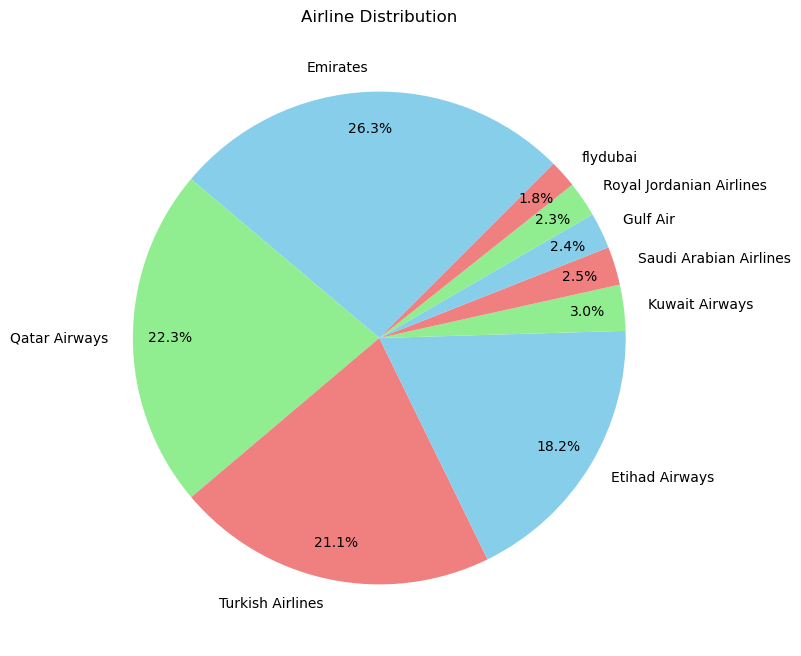

In [9]:
class_distribution = df['airline'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=45, colors=['skyblue', 'lightgreen', 'lightcoral'], textprops={'fontsize': 10}, pctdistance=0.85);df = pd.concat([df, df], ignore_index=True)
plt.title('Airline Distribution')
plt.show()

# 2. Data Preprocessing <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

### Converting categories to numbers

In [7]:
le = LabelEncoder()

In [8]:
df['airline'] = le.fit_transform(df['airline'])
df['traveller_type'] = le.fit_transform(df['traveller_type'])
df['cabin'] = le.fit_transform(df['cabin'])
df['has_layover'] = le.fit_transform(df['has_layover'])
df['recommended'] = le.fit_transform(df['recommended'])
df['pos_neu_neg_review_score'] = le.fit_transform(df['pos_neu_neg_review_score'])

In [9]:
x = df.drop('recommended', axis=1)
y = df.recommended

In [10]:
distribution = y.value_counts()/y.size
print('Distribution of yes and no recommended in data:\n', round(distribution[0], 2), round(distribution[1], 2))

Distribution of yes and no recommended in data:
 0.46 0.54


### Normalizing values to 0 - 1

In [11]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# 3. Individual Model Training <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [13]:
print('Decision Tree')
dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 4, min_samples_split= 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

print('#####################\n\nRandom Forest')
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

print('#####################\n\nSupport Vector Machine')
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

print('#####################\n\nNaive Bayes')
nb = GaussianNB(var_smoothing=1e-9)
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

Decision Tree
Accuracy:  94.0
Precision:  0.95
Recall:  0.93
F1 Score:  0.94
ROC AUC:  0.94
#####################

Random Forest
Accuracy:  99.0
Precision:  1.0
Recall:  0.98
F1 Score:  0.99
ROC AUC:  0.99
#####################

Support Vector Machine
Accuracy:  96.0
Precision:  0.97
Recall:  0.96
F1 Score:  0.96
ROC AUC:  0.96
#####################

Naive Bayes
Accuracy:  82.0
Precision:  0.79
Recall:  0.9
F1 Score:  0.84
ROC AUC:  0.81


### Random Forest

Accuracy:  99.0
Precision:  1.0
Recall:  0.98
F1 Score:  0.99
ROC AUC:  0.99


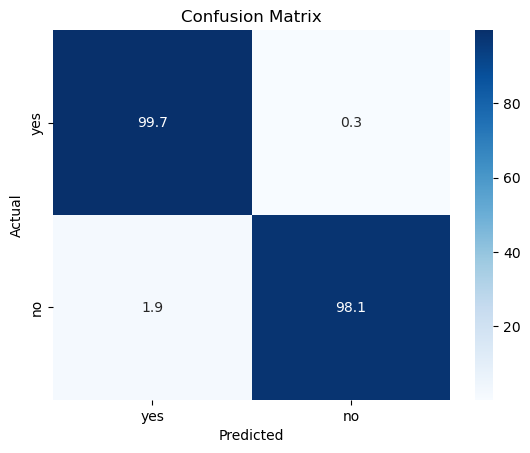

In [52]:
classifier1 = RandomForestClassifier(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('random_forest', classifier1)
], voting='hard')  # 'soft' for using the predicted class probabilities for voting

voting_classifier.fit(x_train, y_train)
y_pred = voting_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('Random Forest\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.98
ROC AUC:  0.98


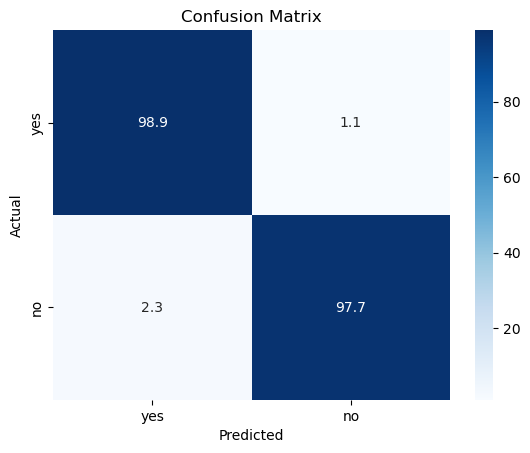

In [53]:
classifier1 = DecisionTreeClassifier(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1)
], voting='hard')  # 'soft' for using the predicted class probabilities for voting

voting_classifier.fit(x_train, y_train)
y_pred = voting_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('Decision Tree\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Support Vector Machine

Accuracy:  96.0
Precision:  0.97
Recall:  0.96
F1 Score:  0.96
ROC AUC:  0.96


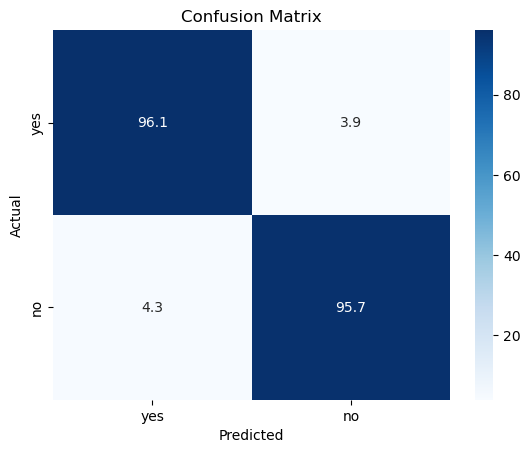

In [54]:
classifier1 = SVC(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('svm', classifier1)
], voting='hard')  # 'soft' for using the predicted class probabilities for voting

voting_classifier.fit(x_train, y_train)
y_pred = voting_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('SVM\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### RF + DT

Accuracy:  99.0
Precision:  1.0
Recall:  0.97
F1 Score:  0.99
ROC AUC:  0.99


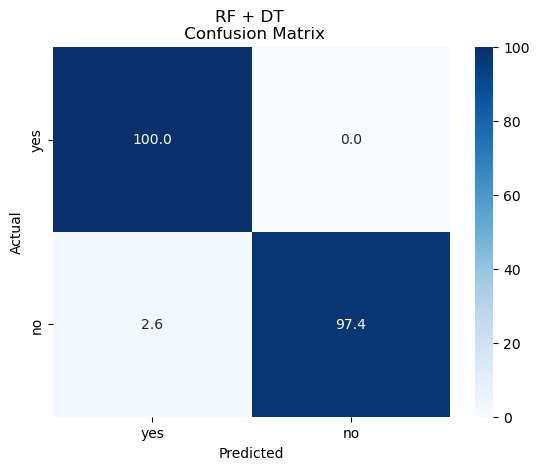

In [56]:
classifier1 = RandomForestClassifier(random_state=42)
classifier2 = DecisionTreeClassifier(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('random_forest', classifier1),
    ('decision_tree', classifier2),
], voting='hard')  # 'soft' for using the predicted class probabilities for voting

voting_classifier.fit(x_train, y_train)
y_pred = voting_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('RF + DT\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM + DT

Accuracy:  97.0
Precision:  1.0
Recall:  0.95
F1 Score:  0.97
ROC AUC:  0.97


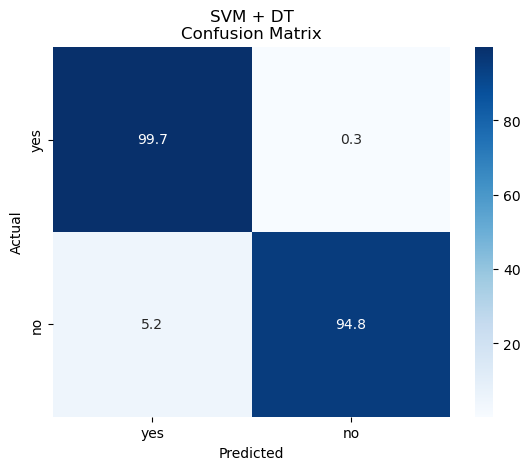

In [57]:
classifier1 = SVC(random_state=42)
classifier2 = DecisionTreeClassifier(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('svm', classifier1),
    ('decision_tree', classifier2),
], voting='hard')  # 'soft' for using the predicted class probabilities for voting

voting_classifier.fit(x_train, y_train)
y_pred = voting_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('SVM + DT\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### All

In [59]:
classifier1 = RandomForestClassifier(random_state=42)
classifier2 = DecisionTreeClassifier(random_state=42)
classifier3 = SVC(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('random_forest', classifier1),
    ('decision_tree', classifier2),
    ('svm', classifier3)
], voting='hard')  # 'soft' for using the predicted class probabilities for voting

voting_classifier.fit(x_train, y_train)
y_pred = voting_classifier.predict(x_test)

Accuracy:  99.0
Precision:  1.0
Recall:  0.98
F1 Score:  0.99
ROC AUC:  0.99


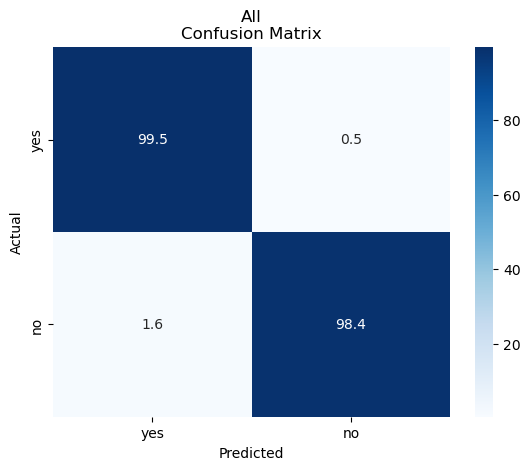

In [60]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('All\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Bagging Classifier <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

### RF

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.99
ROC AUC:  0.99


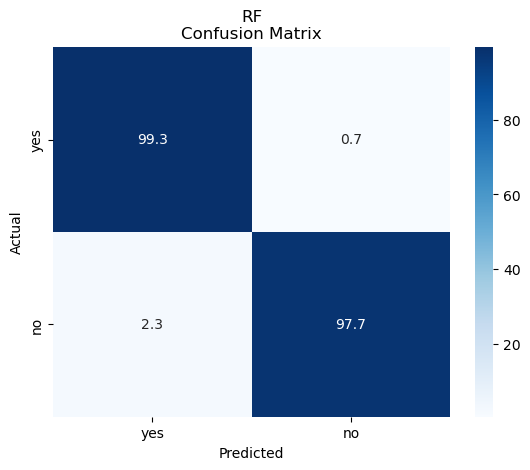

In [61]:
classifier1 = RandomForestClassifier(random_state=42)

bagging_classifier = BaggingClassifier(classifier1, n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('RF\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### DT

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.98
ROC AUC:  0.98


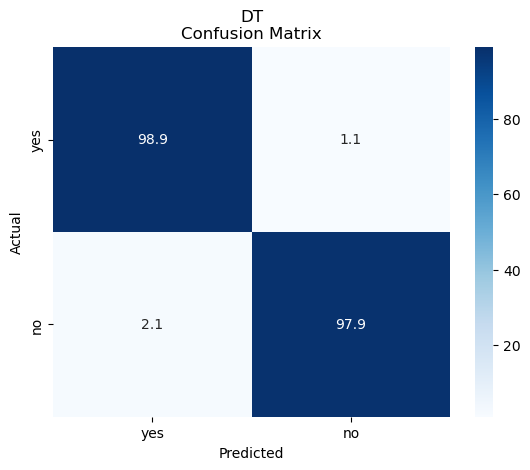

In [62]:
classifier1 = DecisionTreeClassifier(random_state=42)

bagging_classifier = BaggingClassifier(classifier1, n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('DT\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM

Accuracy:  96.0
Precision:  0.97
Recall:  0.95
F1 Score:  0.96
ROC AUC:  0.96


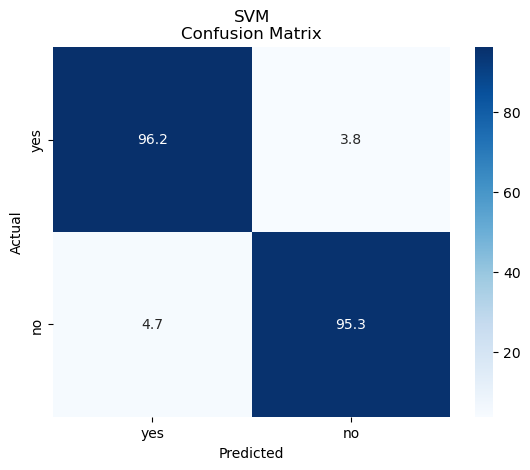

In [63]:
classifier1 = SVC(random_state=42)

bagging_classifier = BaggingClassifier(classifier1, n_estimators=10, random_state=42)
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('SVM\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Boosting Classifier <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

### RF

Accuracy:  99.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.99
ROC AUC:  0.99


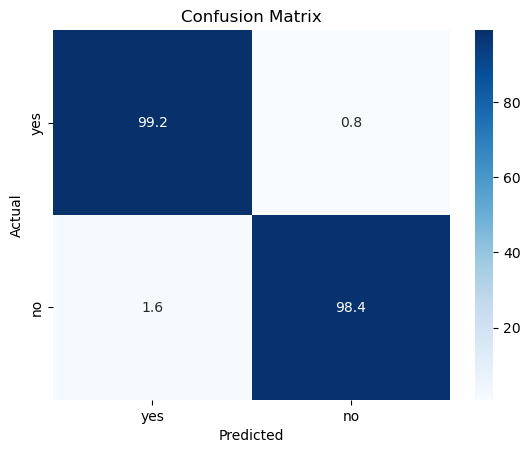

In [65]:
base_classifier = RandomForestClassifier(random_state=42)

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)
y_pred = adaboost_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('RF\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### DT

Accuracy:  98.0
Precision:  0.98
Recall:  0.99
F1 Score:  0.98
ROC AUC:  0.98


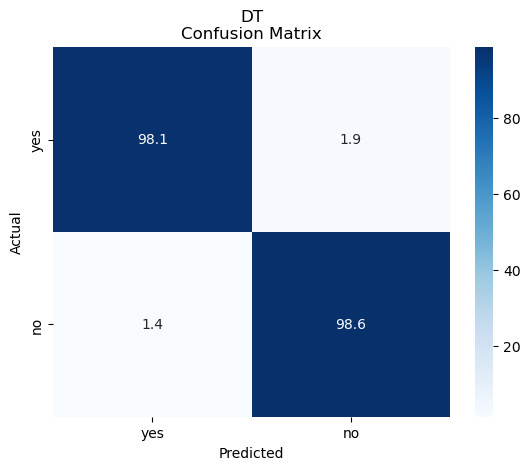

In [66]:
base_classifier = DecisionTreeClassifier(random_state=42)

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)
y_pred = adaboost_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('DT\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### NB

Accuracy:  78.0
Precision:  0.85
Recall:  0.7
F1 Score:  0.77
ROC AUC:  0.78


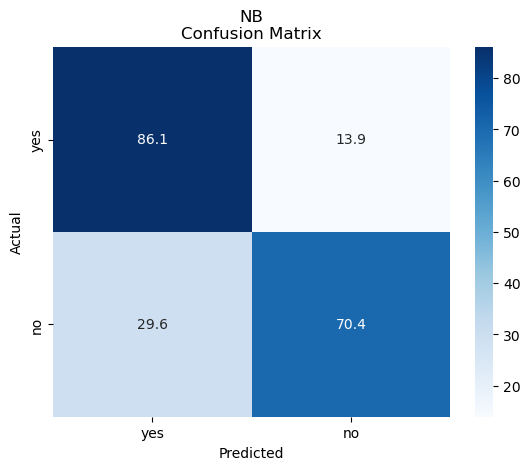

In [71]:
base_classifier = GaussianNB()

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x_train, y_train)
y_pred = adaboost_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('NB\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Stacking Classifier <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

### RF

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.98
ROC AUC:  0.98


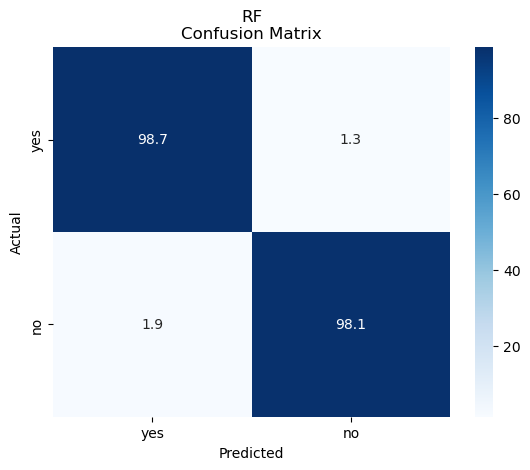

In [14]:
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(x_train, y_train)
y_pred = stacking_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('RF\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### DT

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.98
ROC AUC:  0.98


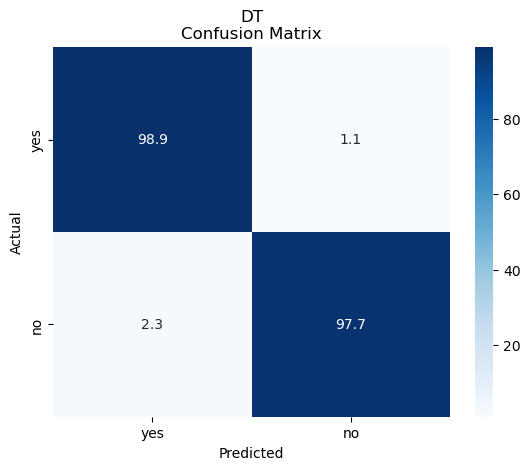

In [16]:
base_classifiers = [
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(x_train, y_train)
y_pred = stacking_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('DT\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### SVM

Accuracy:  96.0
Precision:  0.96
Recall:  0.96
F1 Score:  0.96
ROC AUC:  0.96


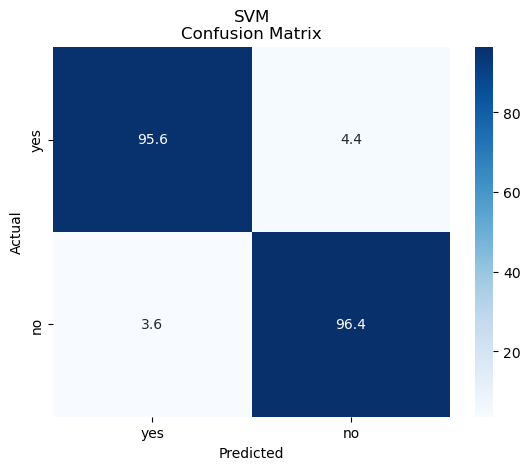

In [17]:
base_classifiers = [
    ('svm', SVC(random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(x_train, y_train)
y_pred = stacking_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('SVM\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### DT + RF

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.98
ROC AUC:  0.98


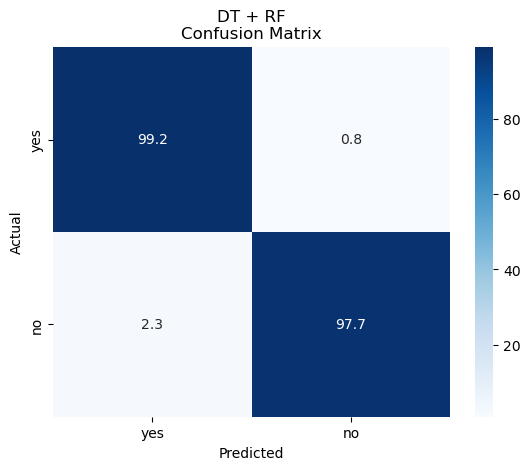

In [18]:
base_classifiers = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(x_train, y_train)
y_pred = stacking_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('DT + RF\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### DT + SVM

Accuracy:  98.0
Precision:  0.98
Recall:  0.98
F1 Score:  0.98
ROC AUC:  0.98


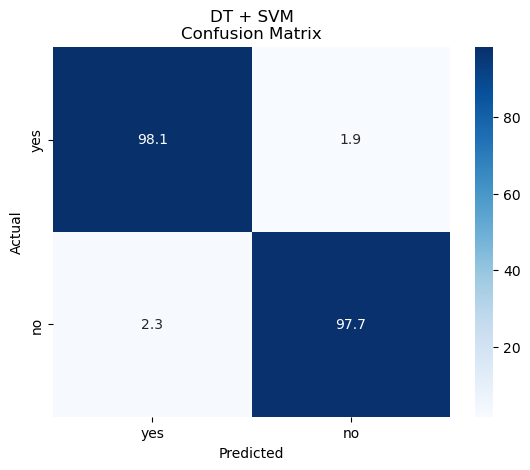

In [19]:
base_classifiers = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(x_train, y_train)
y_pred = stacking_classifier.predict(x_test)

print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('DT + SVM\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### All

In [20]:
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('sv', SVC(random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(x_train, y_train)
y_pred = stacking_classifier.predict(x_test)

Accuracy:  98.0
Precision:  0.99
Recall:  0.98
F1 Score:  0.99
ROC AUC:  0.98


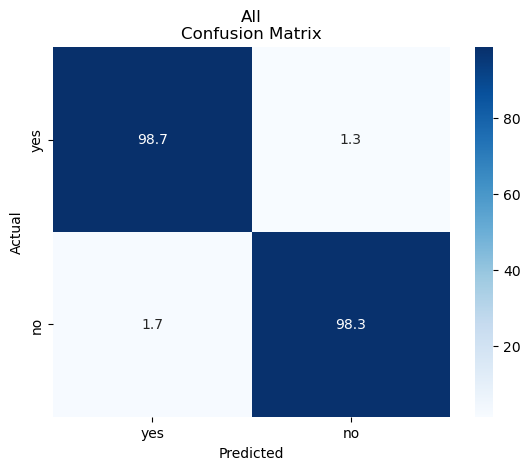

In [21]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred),2)*100)
print('Precision: ', round(precision_score(y_test, y_pred),2))
print('Recall: ', round(recall_score(y_test, y_pred),2))
print('F1 Score: ', round(f1_score(y_test, y_pred),2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred),2))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="Blues", xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.title('All\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()